In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
resampled_train = pd.read_csv('../data/processed/resampled_train.csv', index_col=0)
resampled_test = pd.read_csv('../data/processed/resampled_test.csv', index_col=0)

In [62]:
test_data.head()

203992

In [99]:
analysis_train_data = train_data.groupby(['SiteId', 'year', 'month', 'mday'])

analysis_train_data_value = analysis_train_data['Value'].sum()
analysis_train_data_temp = analysis_train_data['Temperature'].median()

train_data = train_data.drop_duplicates(['SiteId', 'year', 'month', 'mday'])
train_data.merge(analysis_train_data_value, how='left', on=['SiteId', 'year', 'month', 'mday'])
train_data.merge(analysis_train_data_temp, how='left', on=['SiteId', 'year', 'month', 'mday'])
train_data.reset_index()


,Timestamp,SiteId,Value,min,hour,wday,mday,yday,month,year,...,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,off,BaseTemperature,Surface,Temperature
0,2014-09-03 00:00:00,1,9.096555e+05,0,0,2,3,246,9,2014,...,-0.888057,-0.459733,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,19.0
1,2014-09-04 00:00:00,1,1.748273e+06,0,0,3,4,247,9,2014,...,-0.895839,-0.444378,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,20.0
2,2014-09-05 00:00:00,1,4.031663e+06,0,0,4,5,248,9,2014,...,-0.903356,-0.428892,-1.0,-1.836970e-16,0.0,1.0,0.0,18.0,1387.205119,22.0
3,2014-09-06 00:00:00,1,4.031663e+06,0,0,5,6,249,9,2014,...,-0.910605,-0.413279,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,21.0
4,2014-09-07 00:00:00,1,4.031663e+06,0,0,6,7,250,9,2014,...,-0.917584,-0.397543,-1.0,-1.836970e-16,0.0,1.0,1.0,18.0,1387.205119,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36665,2015-11-15 00:00:00,305,2.577411e+02,0,0,6,15,319,11,2015,...,-0.711657,0.702527,-0.5,8.660254e-01,0.0,1.0,1.0,18.0,1296.111786,NaN
36666,2015-11-16 00:00:00,305,2.858852e+02,0,0,0,16,320,11,2015,...,-0.699458,0.714673,-0.5,8.660254e-01,0.0,1.0,0.0,18.0,1296.111786,NaN
36667,2015-11-17 00:00:00,305,2.814414e+02,0,0,1,17,321,11,2015,...,-0.687053,0.726608,-0.5,8.660254e-01,0.0,1.0,0.0,18.0,1296.111786,NaN
36668,2015-11-18 00:00:00,305,3.784646e+02,0,0,2,18,322,11,2015,...,-0.674444,0.738326,-0.5,8.660254e-01,0.0,1.0,0.0,18.0,1296.111786,NaN


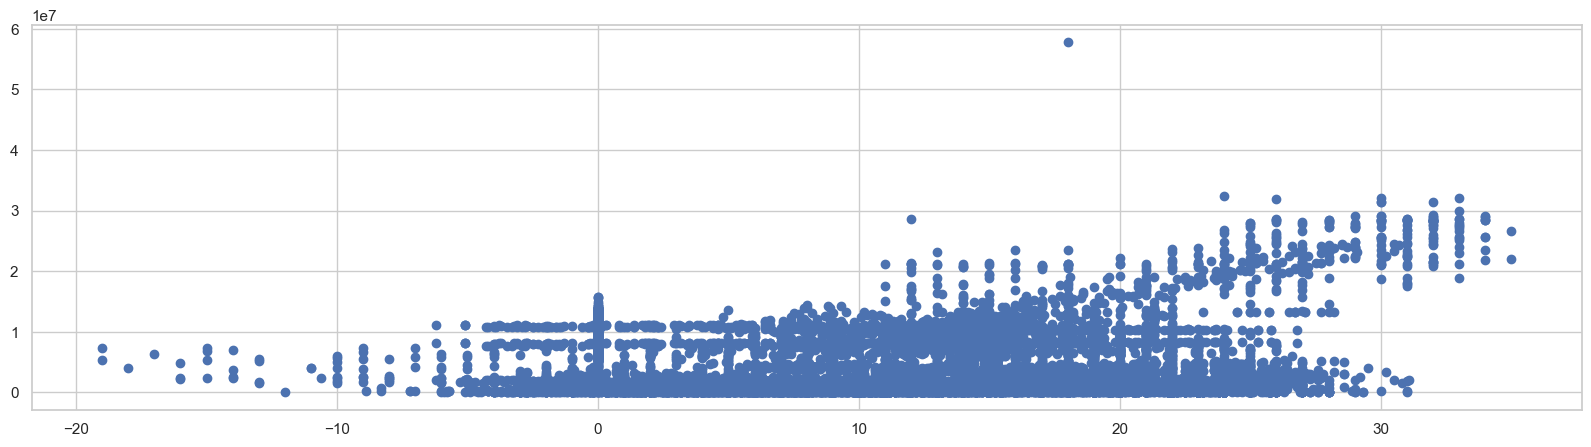

In [100]:
plt.scatter(train_data['Temperature'],train_data['Value'])
plt.show()

<Axes: xlabel='Surface', ylabel='Value'>

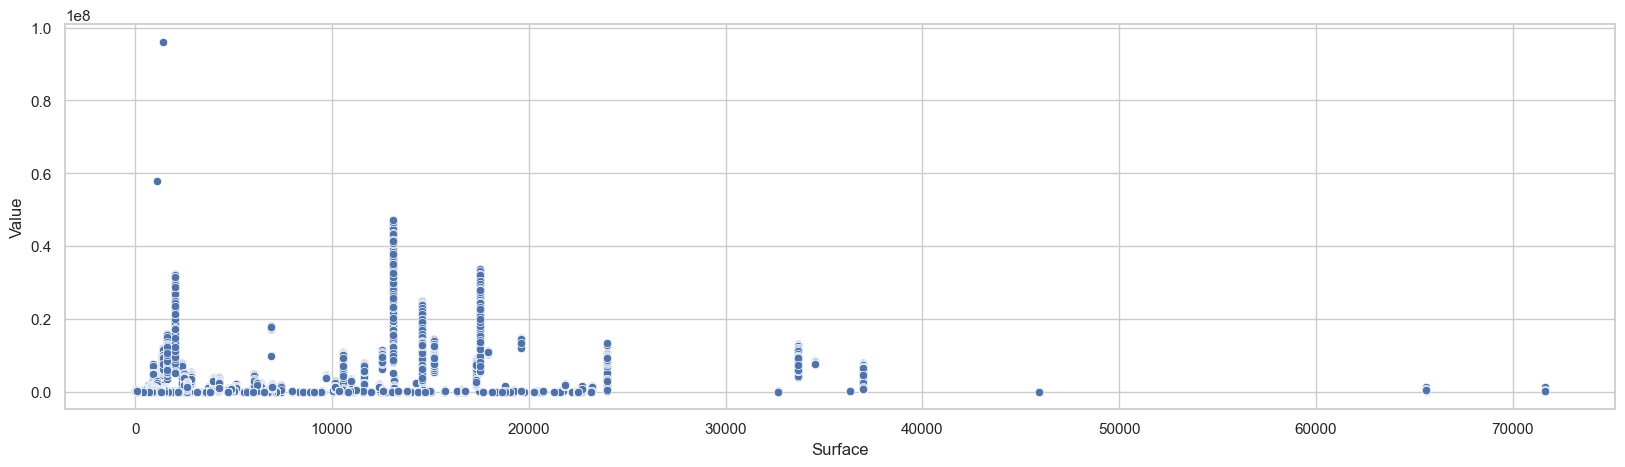

In [101]:
sns.set(style='whitegrid', rc={'figure.figsize':(20, 5)})
sns.scatterplot(x='Surface', y='Value', data=train_data)

<Axes: xlabel='SiteId'>

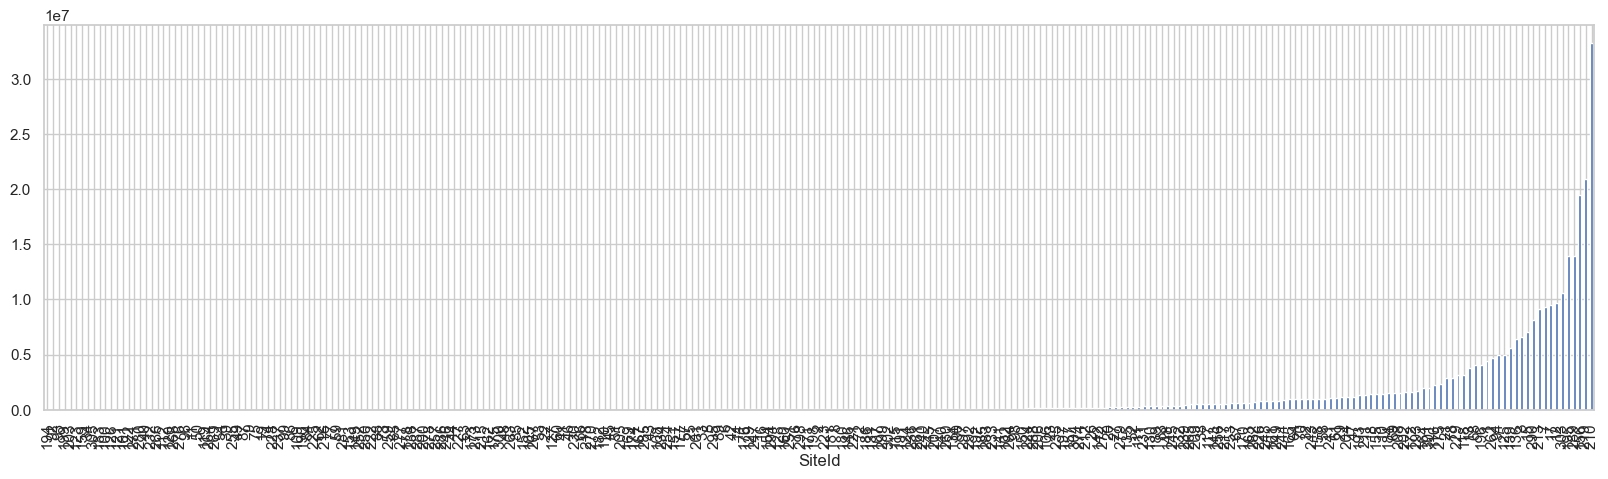

In [102]:
value_by_site = train_data.groupby(['SiteId'])['Value'].mean().sort_values()
value_by_site.plot.bar()

<Axes: xlabel='SiteId'>

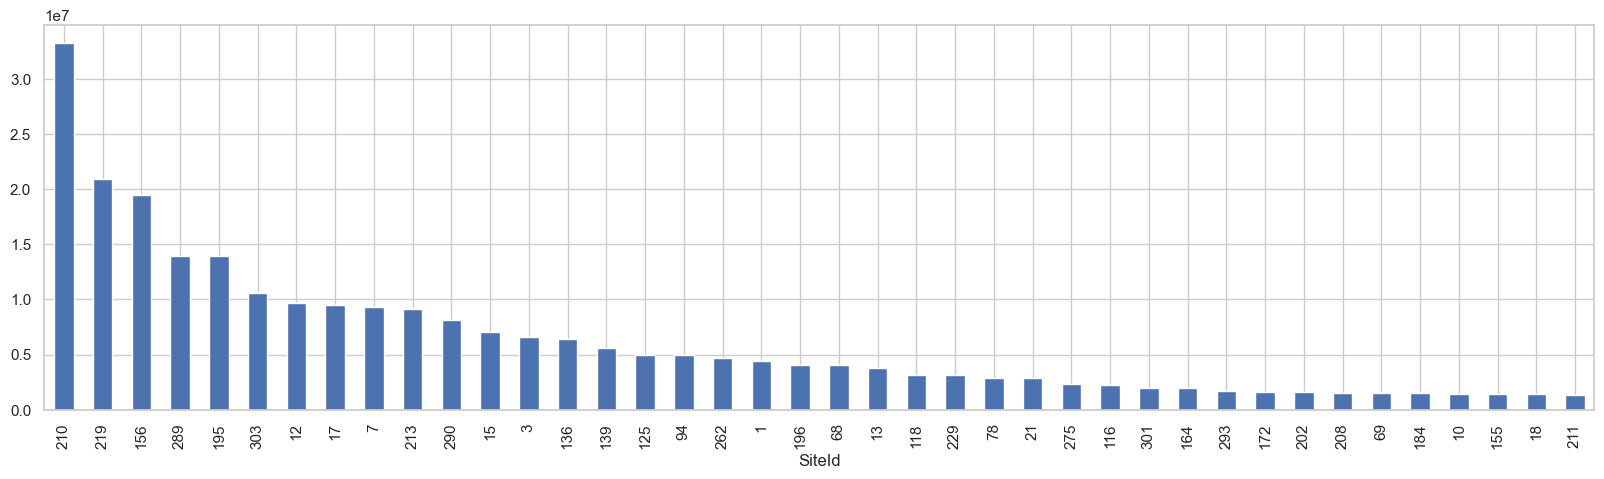

In [104]:
value_by_site = train_data.groupby(['SiteId'])['Value'].mean().sort_values().nlargest(40)
value_by_site.plot.bar()

Mức độ tiêu thụ năng lương trung bình theo tháng

<Axes: xlabel='month'>

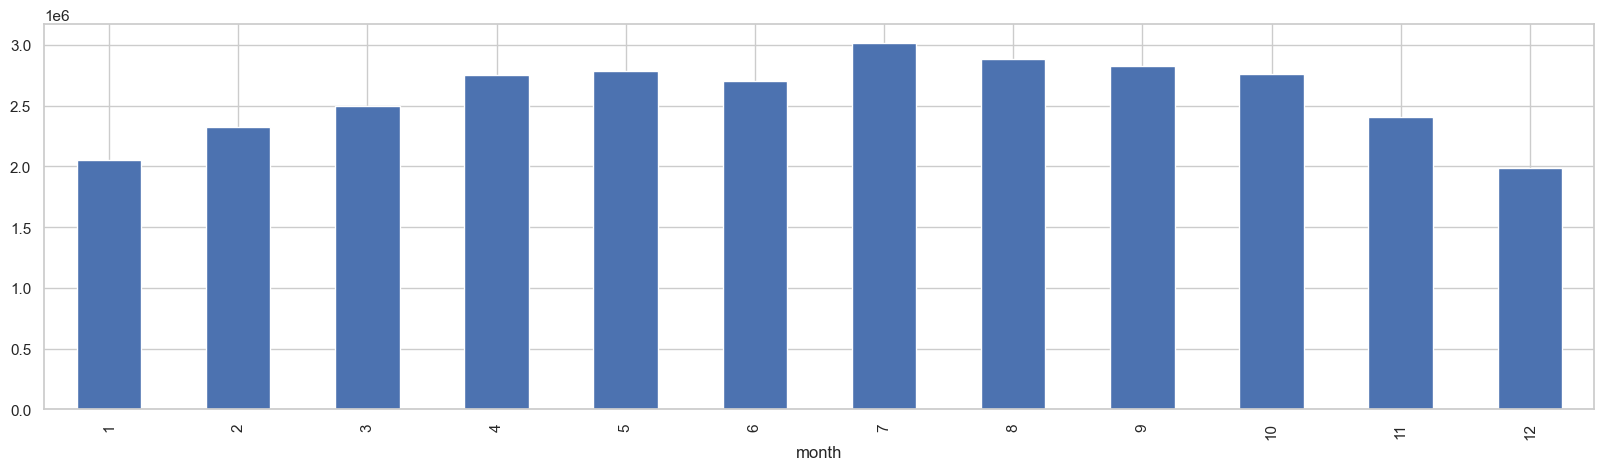

In [105]:
value_by_month = train_data.groupby(['month'])['Value'].mean()
value_by_month.plot.bar()

<Axes: xlabel='wday'>

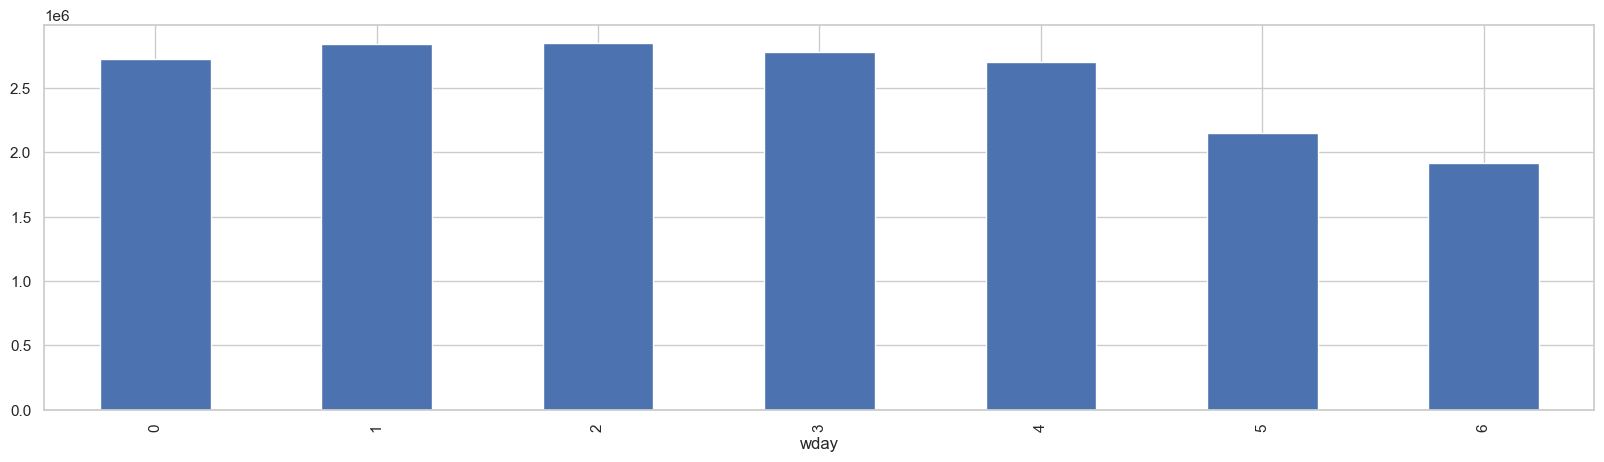

In [106]:
value_by_weekday = train_data.groupby(['wday'])['Value'].mean()
value_by_weekday.plot.bar()